# **Car Price Prediction**

*   To predict the **PRICE OF CARS** based on their specifications such as engine size, horsepower, torque, and acceleration.



# Importing Libraries and Dataset

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
dataset=pd.read_csv('/content/drive/MyDrive/Datasets/Sport car price.csv')

In [158]:
dataset.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


# Exploratory Data Analysis


In [159]:
dataset.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

In [160]:
dataset.shape

(1007, 8)

In [161]:
dataset.dtypes

,0
Car Make,object
Car Model,object
Year,int64
Engine Size (L),object
Horsepower,object
Torque (lb-ft),object
0-60 MPH Time (seconds),object
Price (in USD),object


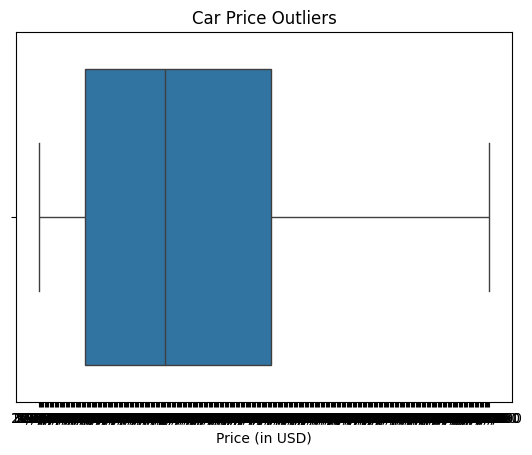

In [162]:
sns.boxplot(x=dataset['Price (in USD)'])
plt.title("Car Price Outliers")
plt.show()

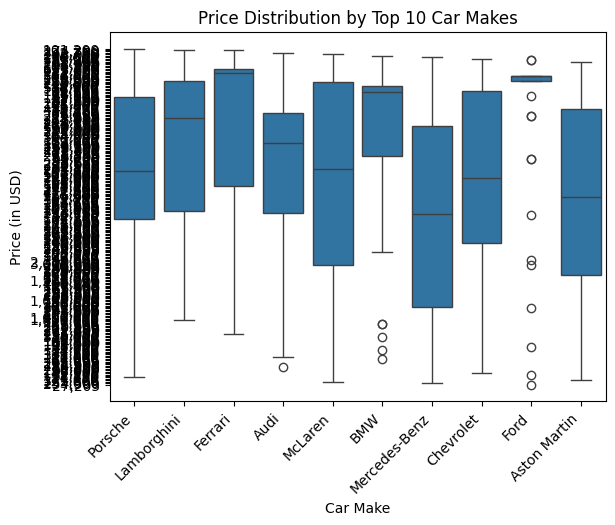

In [163]:
top_makes = dataset["Car Make"].value_counts().head(10).index
sns.boxplot(x="Car Make", y="Price (in USD)", data=dataset[dataset["Car Make"].isin(top_makes)])
plt.xticks(rotation=45, ha="right")
plt.title("Price Distribution by Top 10 Car Makes")
plt.show()

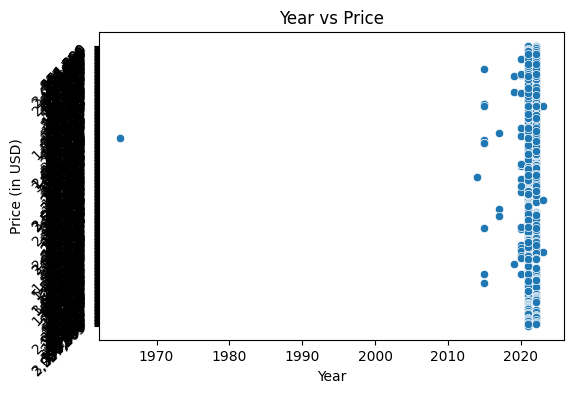

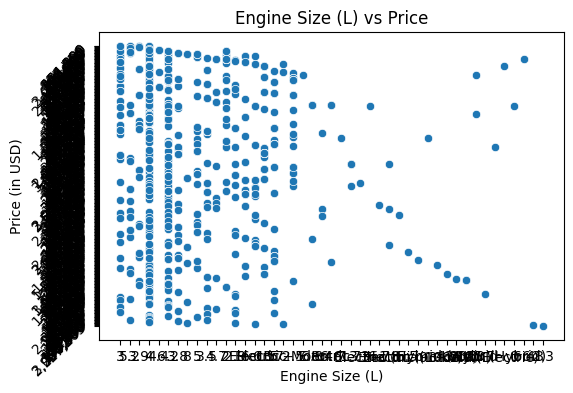

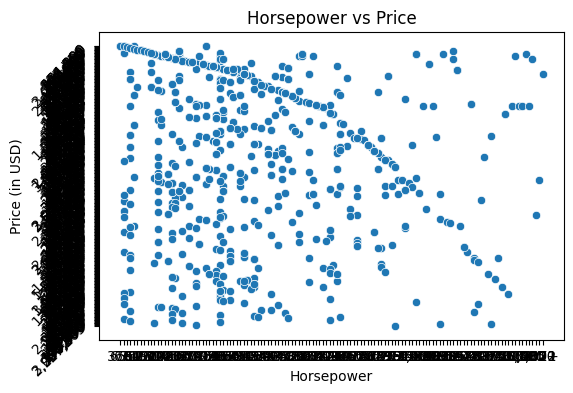

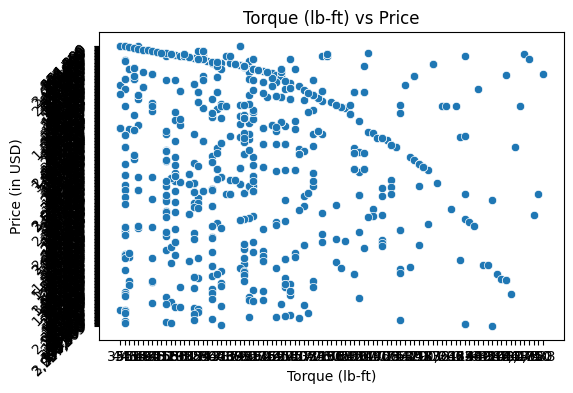

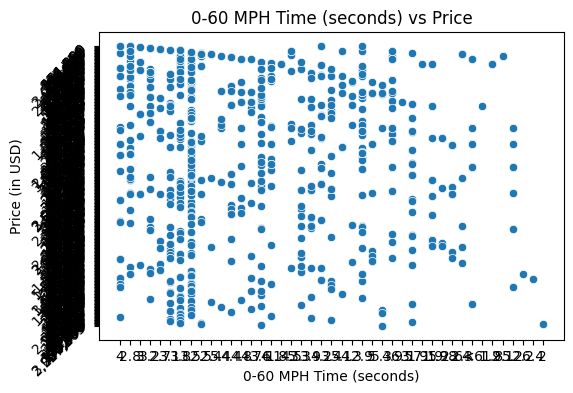

In [164]:
features = ['Year','Engine Size (L)','Horsepower','Torque (lb-ft)','0-60 MPH Time (seconds)']
for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=dataset[col], y=dataset['Price (in USD)'])
    plt.title(f"{col} vs Price")
    plt.yticks(rotation=45, ha="right")
    plt.show()

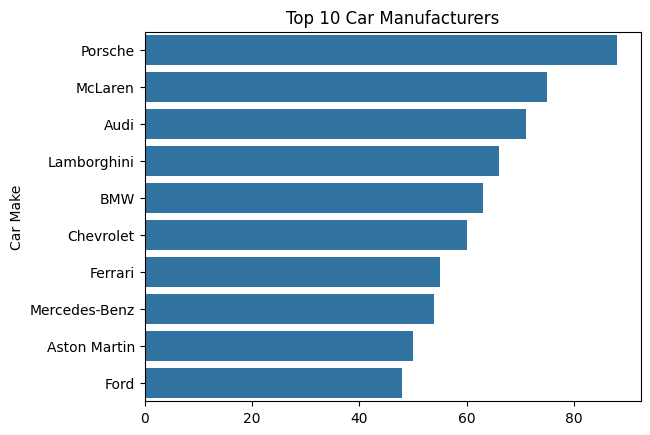

In [165]:
sns.barplot(y=top_makes, x=dataset['Car Make'].value_counts().head(10).values)
plt.title("Top 10 Car Manufacturers")
plt.show()


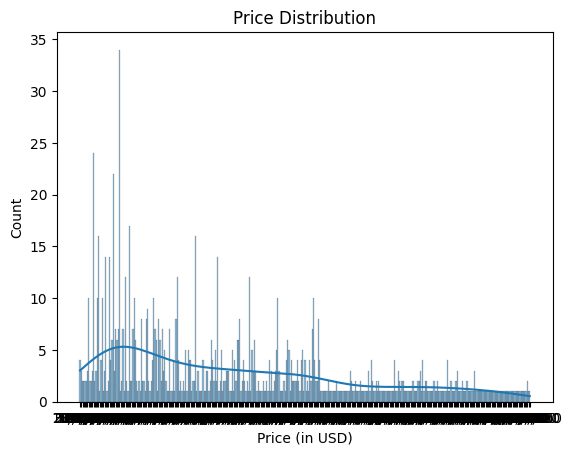

In [166]:
sns.histplot(dataset["Price (in USD)"], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Feature Scaling

In [167]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[::,-1]

In [168]:
X,y

(         Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
 0         Porsche       911  2022               3        379            331   
 1     Lamborghini   Huracan  2021             5.2        630            443   
 2         Ferrari   488 GTB  2022             3.9        661            561   
 3            Audi        R8  2022             5.2        562            406   
 4         McLaren      720S  2021               4        710            568   
 ...           ...       ...   ...             ...        ...            ...   
 1002   Koenigsegg     Jesko  2022               5       1280           1106   
 1003        Lotus     Evija  2021  Electric Motor       1972           1254   
 1004      McLaren     Senna  2021               4        789            590   
 1005       Pagani    Huayra  2021               6        764            738   
 1006        Rimac    Nevera  2021  Electric Motor       1888           1696   
 
      0-60 MPH Time (seconds)  
 0    

In [169]:
X['Horsepower']=pd.to_numeric(X['Horsepower'],errors='coerce')
X['Torque (lb-ft)']=pd.to_numeric(X['Torque (lb-ft)'],errors='coerce')
X['0-60 MPH Time (seconds)']=pd.to_numeric(X['0-60 MPH Time (seconds)'],errors='coerce')
X['Engine Size (L)']=pd.to_numeric(X['Engine Size (L)'],errors='coerce')

In [170]:
y = y.str.replace(',', '').astype(float)

In [171]:
X.dtypes

,0
Car Make,object
Car Model,object
Year,int64
Engine Size (L),float64
Horsepower,float64
Torque (lb-ft),float64
0-60 MPH Time (seconds),float64


In [172]:
y

,Price (in USD)
0,101200.0
1,274390.0
2,333750.0
3,142700.0
4,298000.0
...,...
1002,3000000.0
1003,2000000.0
1004,1000000.0
1005,2600000.0


# Handling Missing Values

In [173]:
X.isnull().sum()

,0
Car Make,0
Car Model,0
Year,0
Engine Size (L),59
Horsepower,9
Torque (lb-ft),8
0-60 MPH Time (seconds),1


In [174]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X[['Engine Size (L)','Horsepower','Torque (lb-ft)','0-60 MPH Time (seconds)']]=imputer.fit_transform(X[['Engine Size (L)','Horsepower','Torque (lb-ft)','0-60 MPH Time (seconds)']])

In [175]:
X.isnull().sum()

,0
Car Make,0
Car Model,0
Year,0
Engine Size (L),0
Horsepower,0
Torque (lb-ft),0
0-60 MPH Time (seconds),0


# Encoding Categorical Variables

In [176]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('ohe', OneHotEncoder(), (['Car Make','Car Model']))],remainder='passthrough')
X=ct.fit_transform(X)

# Splitting The Data Into Training and Testing Sets

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [178]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((805, 219), (202, 219), (805,), (202,))

# Building Multiple Linear Regression Model

In [179]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [180]:
y_pred=regressor.predict(X_test)

In [181]:
y_pred.shape,y_test.shape

((202,), (202,))

# Evaluating Multiple Linear Regression Model

In [182]:
from sklearn.metrics import r2_score,accuracy_score
mlr=r2_score(y_test,y_pred)

In [183]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", scores)
mlr_cv_mean = np.mean(scores)
print("Mean R²:", mlr_cv_mean)
mlr_cv_std = np.std(scores)
print("Standard Deviation of R²:",mlr_cv_std)

Cross-validation R² scores: [0.93 0.95 0.88 0.95 0.98]
Mean R²: 0.9380393030223001
Standard Deviation of R²: 0.033086799934295044


# Building Random Forest Regression Model

In [184]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [185]:
y_pred = regressor.predict(X_test)

# Evaluating Random Forest Regression Model

In [186]:
from sklearn.metrics import r2_score
rf=r2_score(y_test, y_pred)

In [187]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", scores)
rf_cv_mean = np.mean(scores)
rf_cv_std = np.std(scores)
print("Mean R²:", rf_cv_mean)
print("Standard Deviation of R²:", rf_cv_std)

Cross-validation R² scores: [0.91 0.96 0.84 0.95 0.92]
Mean R²: 0.9170113421547625
Standard Deviation of R²: 0.04209954516908569


# Comparing Both Models

In [188]:
results = pd.DataFrame({
    "Model": ["Multiple Linear Regression", "Random Forest Regression"],
    "R²": [mlr, rf],
    "CV Mean R²": [mlr_cv_mean, rf_cv_mean],
    "CV Std Dev": [mlr_cv_std, rf_cv_std]
})
results

,Model,R²,CV Mean R²,CV Std Dev
0,Multiple Linear Regression,0.933143,0.938039,0.033087
1,Random Forest Regression,0.800961,0.917011,0.042100


# Conclusion
- Car prices in this dataset follow mostly **linear relationships** with predictors.  
- **MLR outperforms Random Forest** — making it the preferred model due to **simplicity, accuracy, and interpretability**.  
- Random Forest was useful as a benchmark but is less suitable for this dataset.